# **0. Описание задачи**

**Предсказание инсульта**

По данным Всемирной организации здравоохранения (ВОЗ), инсульт является второй по значимости причиной смерти во всем мире, на которую приходится примерно 11% всех смертей.

Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курения.


Атрибутивная информация:

1) id: уникальный идентификатор

2) gender: "Мужской", "Женский" или "Другой"

3) age: возраст пациента

4) hypertension: 0, если у пациента нет гипертонии, 1 если у пациента гипертония

5) heart_disease: 0, если у пациента нет сердечных заболеваний, 1 если у пациента есть заболевание сердца

6) ever_married: был ли пациент женат-"Нет" или "Да"

7) work_type: тип работы-"частный", "самозанятый", "другое"

8) Residence_type: тип проживания- «сельский» или «городской»

9) avg_glucose_level: средний уровень глюкозы в крови

10) bmi: индекс массы тела

11) smoking_status: статус курения- «ранее курил», «никогда не курил», «курит» или «неизвестно»

12)  stroke: 1, если у пациента был инсульт, или 0, если нет


# **1. Чтение данных**

In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [109]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")


In [110]:
data.shape

(5110, 12)

In [111]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [112]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [113]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Заменим тип "object" на специальный, предназначенный для хранения категориальных значений:

In [114]:
data["gender"] = data["gender"].astype('category')
data["ever_married"] = data["ever_married"].astype('category')
data["work_type"] = data["work_type"].astype('category')
data["Residence_type"] = data["Residence_type"].astype('category')
data["smoking_status"] = data["smoking_status"].astype('category')


In [115]:
data["gender"].dtype

CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False)

In [116]:
data["ever_married"].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [117]:
data["work_type"].dtype

CategoricalDtype(categories=['Govt_job', 'Never_worked', 'Private', 'Self-employed',
                  'children'],
, ordered=False)

In [118]:
data["Residence_type"].dtype

CategoricalDtype(categories=['Rural', 'Urban'], ordered=False)

In [119]:
data["smoking_status"].dtype

CategoricalDtype(categories=['Unknown', 'formerly smoked', 'never smoked', 'smokes'], ordered=False)

# **2. Визуализация данных и вычисление основных характеристик**

Визуализация данных:

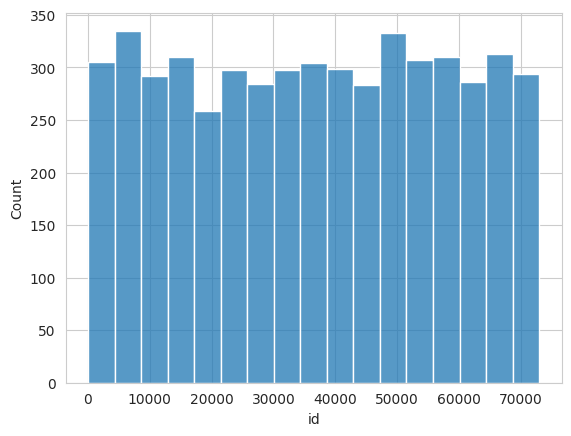

In [120]:
#Рассмотрим признак "id"
sns.histplot(x=data["id"],data=data)
plt.show()

Данный признак можно удалить, т.к. они не зависит риск возникновения инсульта.


In [142]:
data.drop('id', axis=1, inplace=True)

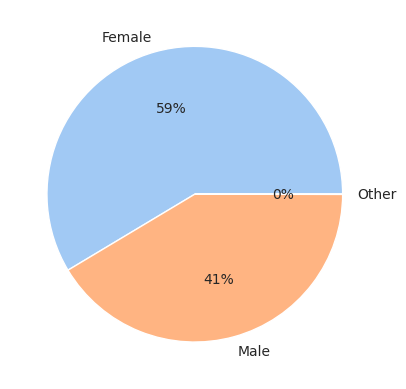

In [145]:
#Рассмотрм признак "gender"
plt.pie(data['gender'].value_counts(), labels=['Female', 'Male', 'Other'], colors = sns.color_palette('pastel')[ 0:3 ], autopct='%.0f%%')
plt.show()

In [146]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [150]:
#Можно удалить Other, т.к. это всего одна запись и скорее всего выброс
data.drop(data[data.gender =='Other'].index, inplace=True)
data['gender'].value_counts()

Female    2994
Male      2115
Other        0
Name: gender, dtype: int64

<ipython-input-154-a3008d2772ca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


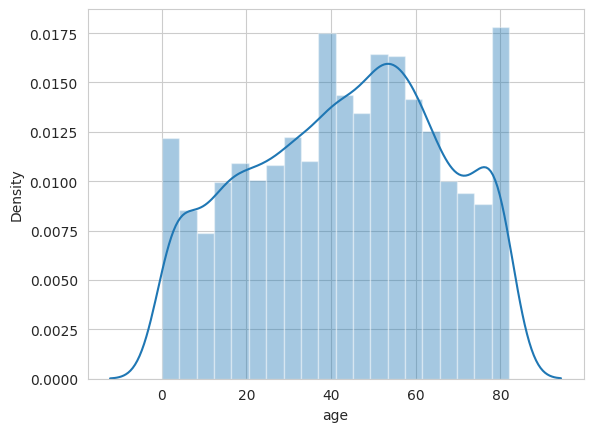

In [154]:
#Рассмотрим признак "age"
sns.distplot(data['age'])
plt.show()

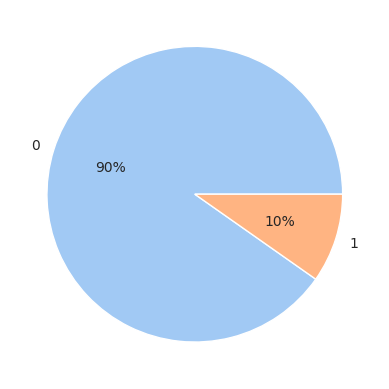

In [155]:
#Рассмотрим признак "hypertension"
plt.pie(data['hypertension'].value_counts(), labels=['0', '1'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

Признак является несбалансированным. У 90% пациентов нет гипертонии, а 10% есть.

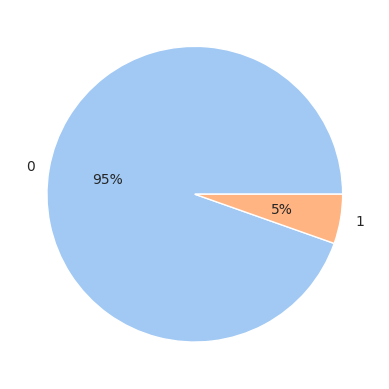

In [156]:
#Рассмотрим признак "heart_disease"
plt.pie(data['heart_disease'].value_counts(), labels=['0', '1'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

Признак является несбалансированным. У 95% пациентов нет заболевания сердца, а 5% есть

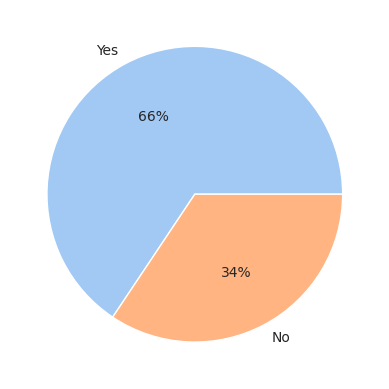

In [157]:
#Рассмотрим признак "ever_married"
plt.pie(data['ever_married'].value_counts(), labels=['Yes', 'No'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

66% пациентов состояли в браке

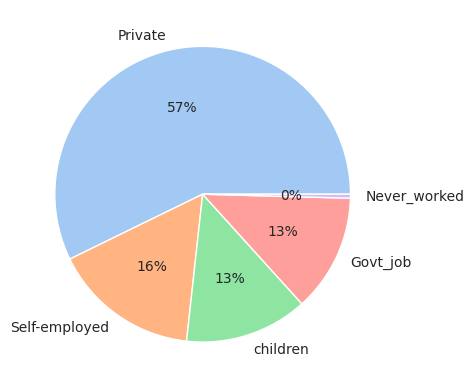

In [159]:
#Рассмотрим признак "work_type"
plt.pie(data['work_type'].value_counts(), labels=['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], colors = sns.color_palette('pastel')[ 0:5], autopct='%.0f%%')
plt.show()

Большинство людей имеею тип работы - частный. Ни разу не работавших практически нет.



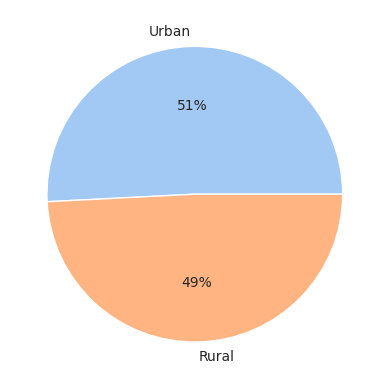

In [160]:
#Рассмотрим признак "Residence_type"
plt.pie(data['Residence_type'].value_counts(), labels=['Urban', 'Rural'], colors = sns.color_palette('pastel')[ 0:2], autopct='%.0f%%')
plt.show()

Практически одинаковое количество сельских и городских жителей

<ipython-input-161-1354f5b914ac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['avg_glucose_level'])


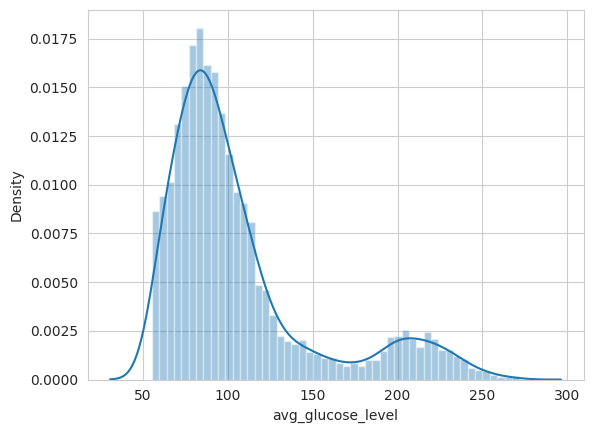

In [161]:
#Рассмотрим признак "avg_glucose_level"
sns.distplot(data['avg_glucose_level'])
plt.show()

<ipython-input-162-077e41963452>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


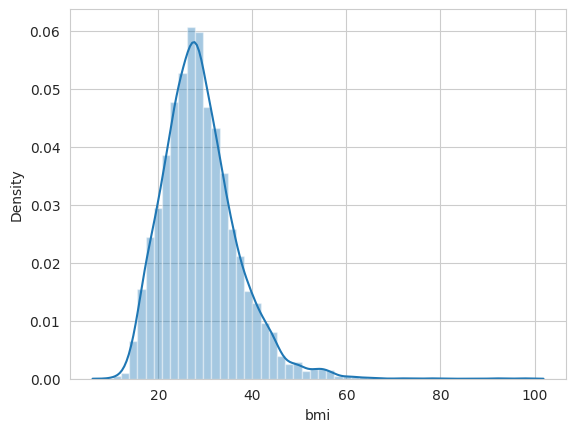

In [162]:
#Рассмотрим признак "bmi"
sns.distplot(data['bmi'])
plt.show()

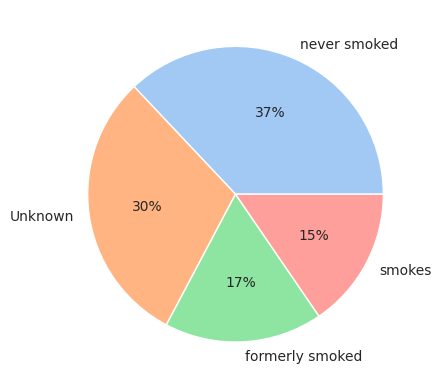

In [163]:
#Рассмотрим признак "smoking_status"
plt.pie(data['smoking_status'].value_counts(), labels=['never smoked', 'Unknown', 'formerly smoked', 'smokes'], colors = sns.color_palette('pastel')[ 0:4], autopct='%.0f%%')
plt.show()

In [164]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [165]:
data.describe(include=['category'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


<ipython-input-166-1709f9f9abad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm')


<Axes: >

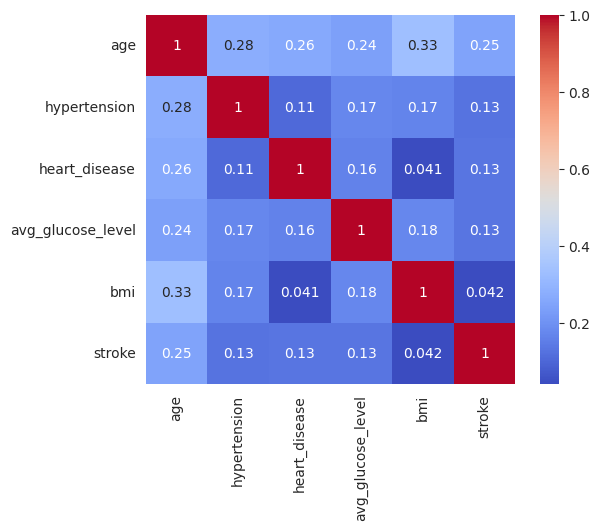

In [166]:
#Корреляционная матрица признаков
sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm')

Числовые признаки не сильно коррелируют между собой.

Посмотрим, как выглядят "бокс-диаграмма" для числовых признаков.

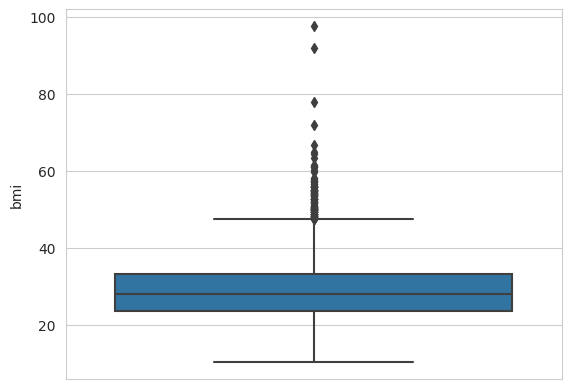

In [122]:
sns.boxplot( y=data["bmi"], data=data)
pass

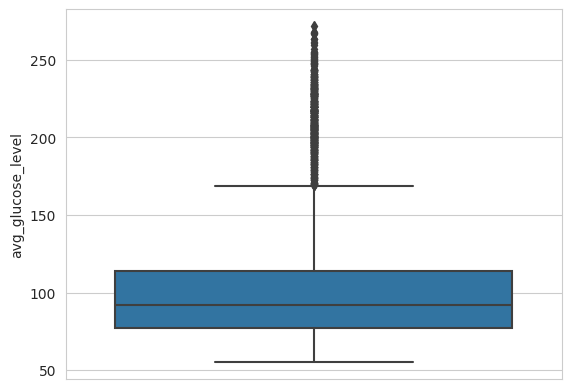

In [123]:
sns.boxplot( y=data["avg_glucose_level"], data=data)
pass

У признаков bmi и avg_glucose_level есть выбросы, но есть предположение, что у людей с повышеным индексом массы или средним уровнем глюкозы, возможен повышенный риск возникновения инсульта.

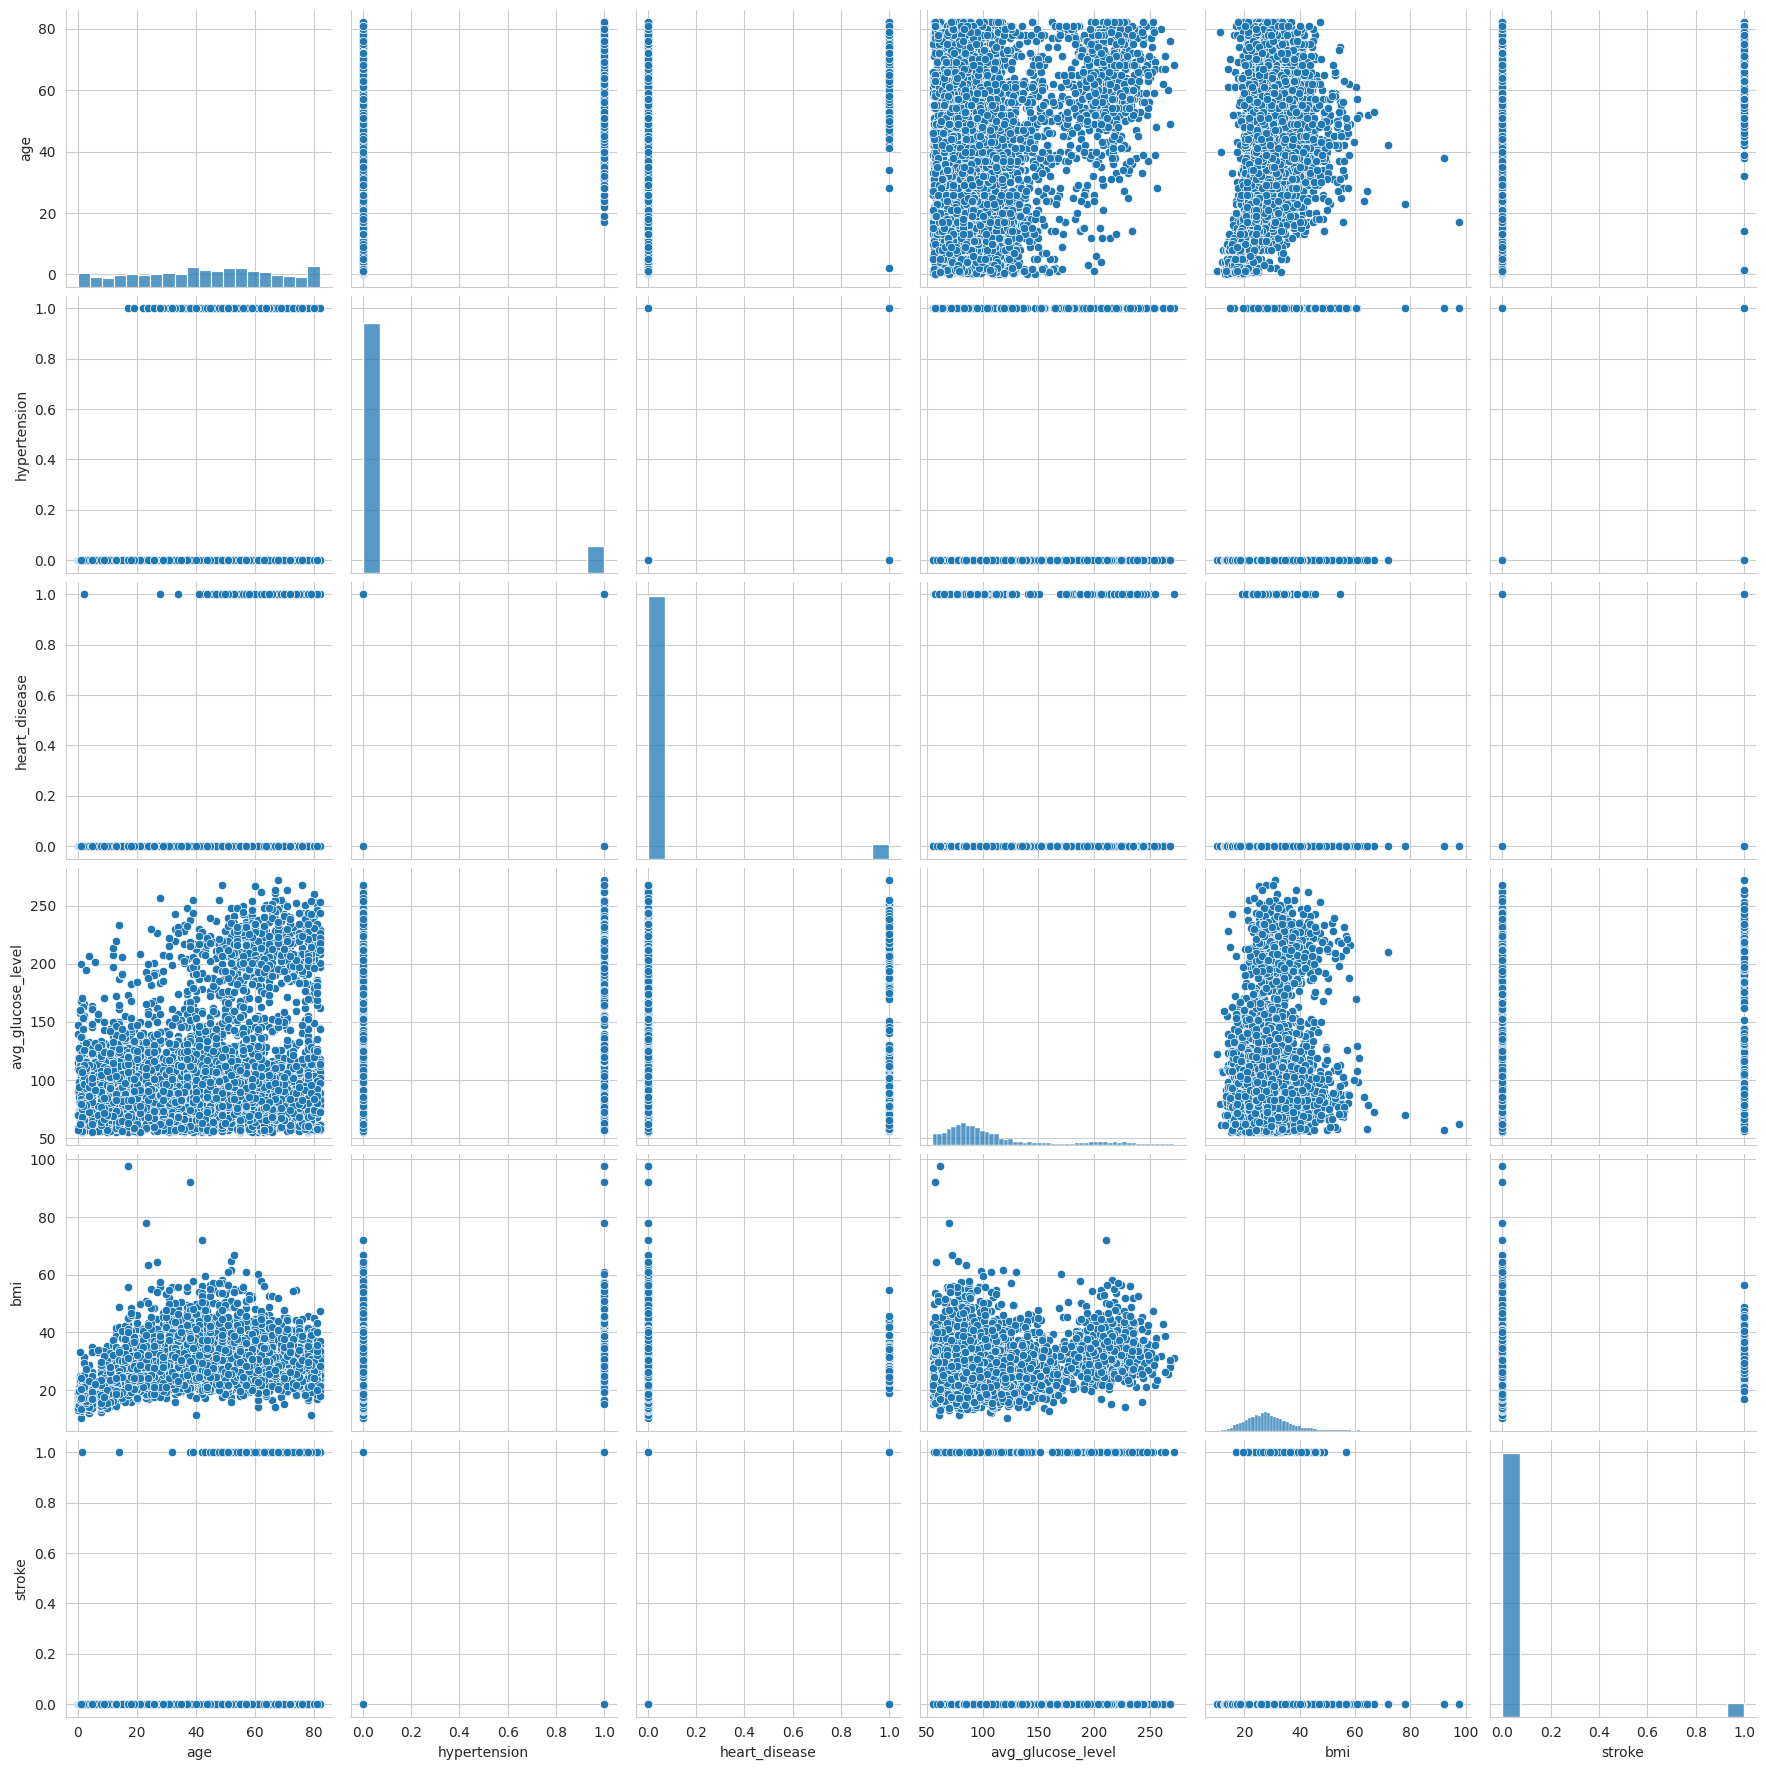

In [169]:
#Диаграммы рассеивания для числових признаков
sns.pairplot(data, diag_kind='hist', height=3, aspect=1)

# **3.Обработка пропущенных значений**

In [170]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Пропущенные значения есть у одного признака bmi и их относительно мало, поэтому их можно просто удалить или можно на значение медианы. Воспользуемся вторым способом.

In [172]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **4. Обработка категориальных признаков**

In [174]:
data = pd.get_dummies(data, drop_first=True)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0


Увеличили количество признаков за счет бинаризации категориальных признаков.

# **5.Нормализация**

Выполним стандартизацию всех признаков:

In [175]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [176]:
data_stand.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,0.0,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03,5.109000e+03
mean,8.344601e-17,5.563067e-17,5.563067e-18,-1.668920e-16,-2.225227e-16,-2.225227e-17,8.622754e-17,NaN,9.179061e-17,-2.086150e-17,-1.001352e-16,5.423990e-17,-9.039984e-17,-7.092910e-17,4.659069e-17,-7.718755e-17,1.418582e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.908145e+00,-3.286053e-01,-2.389481e-01,-1.126651e+00,-2.410886e+00,-2.263284e-01,-8.404014e-01,NaN,-1.381694e+00,-6.575639e-02,-1.156699e+00,-4.368887e-01,-3.941182e-01,-1.016281e+00,-4.573727e-01,-7.668184e-01,-4.273209e-01
25%,-8.061523e-01,-3.286053e-01,-2.389481e-01,-6.381892e-01,-6.575898e-01,-2.263284e-01,-8.404014e-01,NaN,-1.381694e+00,-6.575639e-02,-1.156699e+00,-4.368887e-01,-3.941182e-01,-1.016281e+00,-4.573727e-01,-7.668184e-01,-4.273209e-01
50%,7.827217e-02,-3.286053e-01,-2.389481e-01,-3.149033e-01,-9.913265e-02,-2.263284e-01,-8.404014e-01,NaN,7.236074e-01,-6.575639e-02,8.643597e-01,-4.368887e-01,-3.941182e-01,9.837877e-01,-4.573727e-01,-7.668184e-01,-4.273209e-01
75%,7.858118e-01,-3.286053e-01,-2.389481e-01,1.755460e-01,5.112740e-01,-2.263284e-01,1.189675e+00,NaN,7.236074e-01,-6.575639e-02,8.643597e-01,-4.368887e-01,-3.941182e-01,9.837877e-01,-4.573727e-01,1.303834e+00,-4.273209e-01
max,1.714457e+00,3.042569e+00,4.184190e+00,3.656831e+00,8.927093e+00,4.417494e+00,1.189675e+00,NaN,7.236074e-01,1.520467e+01,8.643597e-01,2.288465e+00,2.536813e+00,9.837877e-01,2.185973e+00,1.303834e+00,2.339704e+00


# **6.Разбиение данных на обучающую и тестовую выборки**

In [243]:
X = data[data.columns[:-1]]
y = data['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(3831, 1278)

In [244]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked
4000,24.00,0,0,105.26,26.1,0,0,0,1,0,1,0,0,1,0,1
3576,41.00,0,0,83.97,28.5,0,1,0,1,0,1,0,0,0,1,0
3032,52.00,0,0,87.51,30.5,0,1,0,1,0,1,0,0,1,1,0
1867,55.00,0,0,63.47,27.8,0,0,0,1,0,1,0,0,0,0,0
494,55.00,0,0,111.19,39.7,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,61.00,0,0,144.14,29.8,0,0,0,1,0,1,0,0,0,0,1
466,61.00,1,0,170.05,60.2,0,0,0,1,0,1,0,0,0,0,0
3092,1.16,0,0,97.28,17.8,0,0,0,0,0,0,0,1,1,0,0
3773,38.00,0,0,93.93,21.5,0,0,0,1,0,0,0,0,0,0,1


In [245]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked
4688,31.0,0,0,64.85,23.0,0,1,0,0,0,0,1,0,0,0,0
4478,40.0,0,0,65.29,28.3,0,1,0,1,0,0,1,0,0,0,1
3521,52.0,0,0,111.04,30.0,0,1,0,1,0,1,0,0,0,0,1
4355,79.0,1,0,76.64,19.5,0,0,0,1,0,0,1,0,0,0,1
3826,75.0,0,0,94.77,27.2,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,54.0,0,0,207.79,38.6,0,0,0,1,0,1,0,0,1,0,1
2437,8.0,0,0,105.63,19.2,0,1,0,0,0,0,0,1,1,0,0
3165,50.0,0,0,59.48,26.6,0,1,0,1,0,1,0,0,0,0,0
92,57.0,0,0,68.02,37.5,1,0,0,0,0,0,1,0,1,0,1


# **7.Запуск классификатора (ререссию) ближайших соседей**

In [280]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_n = KNeighborsClassifier(n_neighbors=3)
k_n.fit(X_train, y_train)

y_train_predict = k_n.predict(X_train)
y_test_predict = k_n.predict(X_test)

print('err_train=', np.mean(y_train != y_train_predict), 'err_test=', np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')

err_train= 0.03680501174628034 err_test= 0.06338028169014084
Accuracy Score train : 96.31949882537197
Accuracy Score test : 93.66197183098592


# **8.Вычислений ошибок на обучающей и тестовой выборках. Выбор оптимального значение гиперпараметра (к- ближайших соседей)**

In [274]:
from sklearn.model_selection import GridSearchCV
nnb = list(range(1, 30))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.04411376740644035 14


In [282]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('err_train=', err_train, 'err_test=', err_test)
print(f'Accuracy Score train : {accuracy_score(y_train, knn.predict(X_train))*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, knn.predict(X_test))*100}')

err_train= 0.04411380840511616 err_test= 0.06259780907668232
Accuracy Score train : 95.58861915948839
Accuracy Score test : 93.74021909233177


Вывод: Метод k-ближайших соседей протестирован при различных значениях параметра. Определение класса при k=3 показазало точность классификации почти 96.3% на обучающей выборке и 93.66% на тестовой выборке, при k равным оптимальному значению точность классификации 95.6% на обучающей выборке и 93.74% на тестовой выборке.